In [90]:
#from google.colab import drive
#drive.mount("/content/drive")



In [91]:
pip install plotly


Note: you may need to restart the kernel to use updated packages.


In [92]:
import plotly.graph_objects as go
import os
import pandas as pd

In [93]:
#ruta_de_archivos="/content/drive/MyDrive/ipynb_checkpoints"

ruta_de_archivos='c:/Users/Usuario/Desktop/ipynb_checkpoints'
archivos= os.listdir(ruta_de_archivos)

In [94]:
archivos

['Dataset_de_ventas_Abril.csv',
 'Dataset_de_ventas_Agosto.csv',
 'Dataset_de_ventas_Diciembre.csv',
 'Dataset_de_ventas_Enero.csv',
 'Dataset_de_ventas_Febrero.csv',
 'Dataset_de_ventas_Julio.csv',
 'Dataset_de_ventas_Junio.csv',
 'Dataset_de_ventas_Marzo.csv',
 'Dataset_de_ventas_Mayo.csv',
 'Dataset_de_ventas_Noviembre.csv',
 'Dataset_de_ventas_Octubre.csv',
 'Dataset_de_ventas_Septiembre.csv']

In [95]:
# Inicializa un DataFrame vacío para almacenar los datos combinados
datos_combinados = pd.DataFrame()

# Itera a través de la lista de archivos y combina los datos en el DataFrame
for archivo in archivos:
    #print (archivo)
    if archivo.endswith('.csv'):  # Asegurarse de que solo se consideren archivos CSV
      ruta_completa = os.path.join(ruta_de_archivos, archivo)  # Ruta completa al archivo
      df = pd.read_csv(ruta_completa)
      datos_combinados = pd.concat([datos_combinados, df], ignore_index=True)

# Guarda el DataFrame resultante en un nuevo archivo CSV
#datos_combinados.to_csv(f"/content/drive/MyDrive/ipynb_checkpoints/datos_combinados.csv", index=False)
datos_combinados.to_csv(f"c:/Users/Usuario/Desktop/datos_combinados/datos_combinados.csv",index=False)
#datos_combinados.to_csv(f"/content/drive/MyDrive/Colab Notebooks/ELEMENTOS DE APRENDIZAJE DE MÁQUINA Y BIG DATA/PROYECTO1/datos_combinados.csv", index=False)


In [96]:
datos_combinados

,ID de Pedido,Producto,Cantidad Pedida,Precio Unitario,Fecha de Pedido,Dirección de Envio
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


**LIMPIEZA BÁSICA**

In [97]:
datos_combinados = datos_combinados.drop_duplicates() # Elimino filas duplicadas



In [98]:
datos_combinados

,ID de Pedido,Producto,Cantidad Pedida,Precio Unitario,Fecha de Pedido,Dirección de Envio
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [99]:

datos_combinados['Cantidad Pedida'] = pd.to_numeric(datos_combinados['Cantidad Pedida'], errors='coerce')  #El errors= 'coerce' transforma los valores no numericos a NaN'
datos_combinados['Precio Unitario'] = pd.to_numeric(datos_combinados['Precio Unitario'], errors='coerce')


datos_combinados = datos_combinados.loc[~datos_combinados['Cantidad Pedida'].isna()]
datos_combinados = datos_combinados.loc[~datos_combinados['Precio Unitario'].isna()]

        # Elimino todos los Nan y me quedo solo con los valores numericos
datos_combinados = datos_combinados.dropna()

        # Transformo todos los valores numericos al tipo de dato int
datos_combinados['Cantidad Pedida'] = datos_combinados['Cantidad Pedida'].astype(int)
datos_combinados['Precio Unitario'] = datos_combinados['Precio Unitario'].astype(int)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_128\1391457033.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Usuario\AppData\Local\Temp\ipykernel_128\1391457033.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [100]:
datos_combinados

,ID de Pedido,Producto,Cantidad Pedida,Precio Unitario,Fecha de Pedido,Dirección de Envio
0,176558,USB-C Charging Cable,2,11,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"



----------------------------------------------------------------------------------------------------------------------------------------------------------------
1. Comportamiento de las ventas en los distintos meses:

  ● ¿Cómo variaron las ventas a lo largo de los diferentes meses?

  ● ¿Hubo algún mes que se destacó en términos de ventas?

  ● ¿Cuál es el ingreso total generado por mes?

----------------------------------------------------------------------------------------------------------------------------------------------------------------

In [101]:
#Trasformo los valores en un formato de fecha y hora
datos_combinados['Fecha de Compra'] = pd.to_datetime(datos_combinados['Fecha de Pedido']) #Si no aplicamos esto, cuando queremos extraer la hora nos tira error

C:\Users\Usuario\AppData\Local\Temp\ipykernel_128\4060360010.py:2: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



In [102]:
# Realizamos una funcion
def extraer_mes(datos):
  datos['Mes'] = datos['Fecha de Compra'].dt.month

  return datos

In [103]:
datos_combinados =  extraer_mes(datos_combinados) #Aplicamos la funcion

datos_combinados = datos_combinados.sort_values(by='Mes')#ordeno los meses
datos_combinados

,ID de Pedido,Producto,Cantidad Pedida,Precio Unitario,Fecha de Pedido,Dirección de Envio,Fecha de Compra,Mes
58768,144330,AA Batteries (4-pack),1,3,01/11/19 14:37,"112 13th St, San Francisco, CA 94016",2019-01-11 14:37:00,1
61972,147381,Apple Airpods Headphones,1,150,01/27/19 10:49,"181 Cedar St, Boston, MA 02215",2019-01-27 10:49:00,1
61973,147382,LG Dryer,1,600,01/13/19 10:58,"222 7th St, Los Angeles, CA 90001",2019-01-13 10:58:00,1
61974,147383,Lightning Charging Cable,1,14,01/14/19 15:43,"752 West St, New York City, NY 10001",2019-01-14 15:43:00,1
61975,147384,AA Batteries (4-pack),1,3,01/24/19 20:42,"772 7th St, Portland, OR 97035",2019-01-24 20:42:00,1
...,...,...,...,...,...,...,...,...
47167,311697,USB-C Charging Cable,1,11,12/12/19 07:29,"216 9th St, Austin, TX 73301",2019-12-12 07:29:00,12
47168,311698,Google Phone,1,600,12/09/19 20:10,"315 1st St, Boston, MA 02215",2019-12-09 20:10:00,12
47169,311699,Lightning Charging Cable,1,14,12/16/19 17:18,"468 Adams St, Los Angeles, CA 90001",2019-12-16 17:18:00,12
47147,311678,27in 4K Gaming Monitor,1,389,12/15/19 23:24,"126 Dogwood St, Atlanta, GA 30301",2019-12-15 23:24:00,12


In [104]:
# Agrupo los Productoos y la cantidad ordenada y realizo la sumatoria de los Productoos vendidos
Productos_vendidos = datos_combinados.groupby('Mes')['Cantidad Pedida'].sum() #Aca se puede hacer muchas operaciones .sum() .min() .max() .std() etc

# Ordeno los de mayor a menor segun la cantidad de Productoos vendidos
#Productos_vendidos_ordenados = Productos_vendidos.sort_values(ascending=False )

#crea el dataframe
df_Productos = pd.DataFrame({'Mes':Productos_vendidos.index, 'Cantidad Pedida':Productos_vendidos.values})


df_Productos

,Mes,Cantidad Pedida
0,1,10893
1,2,13431
2,3,16979
3,4,20536
4,5,18653
5,6,15234
6,7,16054
7,8,13429
8,9,13091
9,10,22669


In [105]:
# Define un diccionario de mapeo de números a nombres de meses
meses = {
    1: 'enero',
    2: 'febrero',
    3: 'marzo',
    4: 'abril',
    5: 'mayo',
    6: 'junio',
    7: 'julio',
    8: 'agosto',
    9: 'septiembre',
    10: 'octubre',
    11: 'noviembre',
    12: 'diciembre'
}

# Aplica el reemplazo utilizando el diccionario
df_Productos['Mes'] = df_Productos['Mes'].map(meses)


df_Productos

,Mes,Cantidad Pedida
0,enero,10893
1,febrero,13431
2,marzo,16979
3,abril,20536
4,mayo,18653
5,junio,15234
6,julio,16054
7,agosto,13429
8,septiembre,13091
9,octubre,22669


In [106]:
import plotly.graph_objects as go

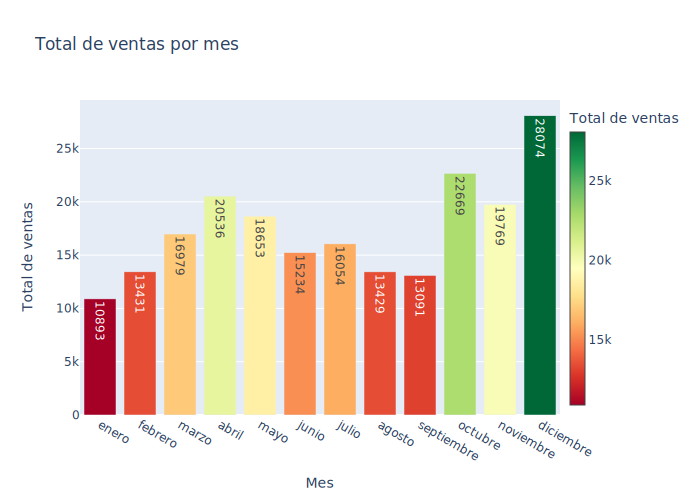

In [107]:
# Creo el objeto figura con el gráfico de barras
fig = go.Figure()

fig.add_trace(go.Bar(
    x=df_Productos.Mes,
    y=df_Productos['Cantidad Pedida'],
    marker=dict(color=df_Productos['Cantidad Pedida'], colorscale = 'RdYlGn', colorbar=dict(title="Total de ventas", x=1.0, thickness=15)),  # Color y barra de colores
    text=df_Productos['Cantidad Pedida'],
    textposition='auto',  # Muestro el valor encima de las barras

))

# Configuro los ejes y los títulos
fig.update_layout(
    title="Total de ventas por mes",
    xaxis=dict(title="Mes"),
    yaxis=dict(title="Total de ventas"),
)

fig.show()

In [108]:

# Suponiendo que tienes un DataFrame llamado datos_combinados con columnas 'Mes', 'Precio Unitario' y 'Cantidad Vendida'
# Calcula el total de ingresos para cada mes
datos_combinados['Total Ingresos'] = datos_combinados['Precio Unitario'] * datos_combinados['Cantidad Pedida']

# Agrupa los datos por mes y suma los ingresos
total_ingresos = datos_combinados.groupby('Mes')['Total Ingresos'].sum()

# Imprime el resultado
total_ingresos
#df_Productos2

total_ingresos = pd.DataFrame({'Mes':total_ingresos.index, 'Total por mes':total_ingresos.values})
total_ingresos

,Mes,Total por mes
0,1,1813120
1,2,2189767
2,3,2791960
3,4,3373517
4,5,3136309
5,6,2564680
6,7,2634145
7,8,2230826
8,9,2084353
9,10,3717286


In [109]:
# Aplica el reemplazo utilizando el diccionario
total_ingresos['Mes'] = total_ingresos['Mes'].map(meses)


total_ingresos

,Mes,Total por mes
0,enero,1813120
1,febrero,2189767
2,marzo,2791960
3,abril,3373517
4,mayo,3136309
5,junio,2564680
6,julio,2634145
7,agosto,2230826
8,septiembre,2084353
9,octubre,3717286


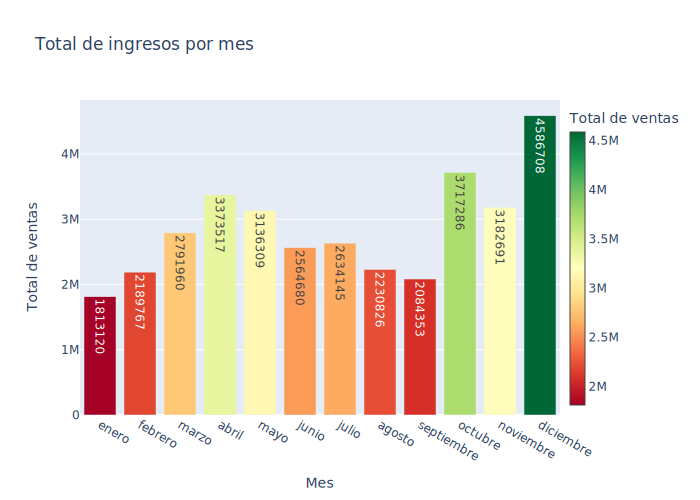

In [110]:
# Creo el objeto figura con el gráfico de barras
fig = go.Figure()

fig.add_trace(go.Bar(
    x=total_ingresos.Mes,
    y=total_ingresos['Total por mes'],
    marker=dict(color=total_ingresos['Total por mes'], colorscale = 'RdYlGn', colorbar=dict(title="Total de ventas", x=1.0, thickness=15)),  # Color y barra de colores
    text=total_ingresos['Total por mes'],
    textposition='auto',  # Muestro el valor encima de las barras

))

# Configuro los ejes y los títulos
fig.update_layout(
    title="Total de ingresos por mes",
    xaxis=dict(title="Mes"),
    yaxis=dict(title="Total de ventas"),
)

fig.show()

----------------------------------------------------------------------------------------------------------------------------------------------------------------

2. Optimización de la publicidad y patrón de ventas por hora:

● ¿Cuál es el momento ideal del día para presentar la publicidad y aumentar la
probabilidad de compra?

● ¿Cómo cambian los patrones de ventas por hora a lo largo del año?

● ¿Hay modificaciones en los patrones de ventas durante las horas de mayor actividad
en los distintos meses?

----------------------------------------------------------------------------------------------------------------------------------------------------------------

In [111]:
# Convertir 'Fecha de Compra' al formato datetime
datos_combinados['Fecha de Compra'] = pd.to_datetime(datos_combinados['Fecha de Compra'], format='%m/%d/%y %H:%M')

# Extraer la hora del día
datos_combinados['Hora del Día'] = datos_combinados['Fecha de Compra'].dt.hour

# Calcular la probabilidad de compra por hora del día
probabilidad_compra_por_hora = datos_combinados.groupby('Hora del Día')['ID de Pedido'].count() / len(datos_combinados)

# Encontrar el momento ideal
momento_ideal = probabilidad_compra_por_hora.idxmax()

print(f"El momento ideal para presentar publicidad es a las {momento_ideal}:00 horas.")



El momento ideal para presentar publicidad es a las 19:00 horas.


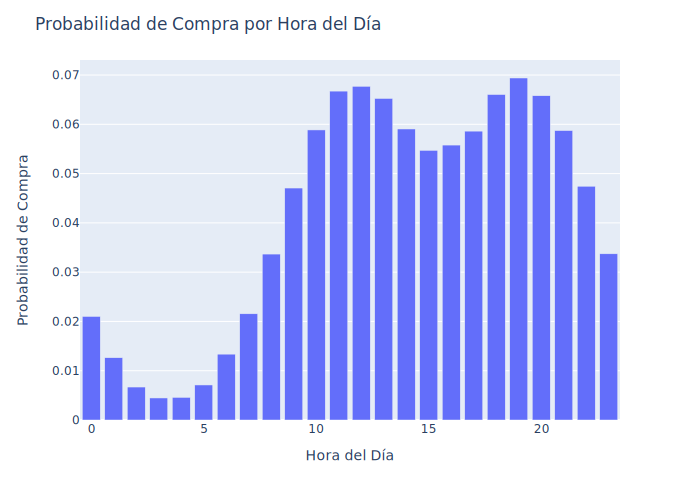

In [112]:
import plotly.express as px

# Calcular la probabilidad de compra por hora del día
probabilidad_compra_por_hora = datos_combinados.groupby('Hora del Día')['ID de Pedido'].count() / len(datos_combinados)

# Crear un gráfico de barras interactivo con Plotly
fig = px.bar(probabilidad_compra_por_hora, x=probabilidad_compra_por_hora.index, y=probabilidad_compra_por_hora.values)

# Configurar el título y etiquetas de los ejes
fig.update_layout(title='Probabilidad de Compra por Hora del Día', xaxis_title='Hora del Día', yaxis_title='Probabilidad de Compra')

# Mostrar el gráfico interactivo
fig.show()


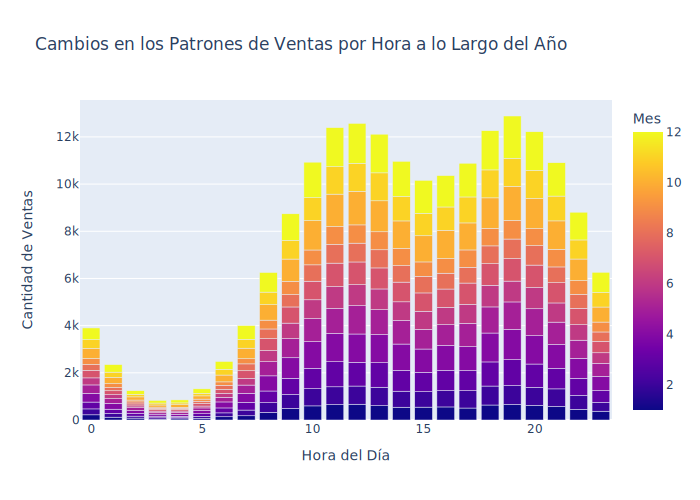

In [113]:
import pandas as pd
import plotly.express as px

# Extraer el mes de la columna 'Fecha de Compra'
datos_combinados['Mes'] = datos_combinados['Fecha de Compra'].dt.month

# Crear un DataFrame con la cantidad de ventas por hora para cada mes
ventas_por_hora_por_mes = datos_combinados.groupby(['Mes', 'Hora del Día'])['ID de Pedido'].count().reset_index()

# Crear un gráfico de barras interactivo con Plotly Express
fig = px.bar(ventas_por_hora_por_mes, x='Hora del Día', y='ID de Pedido', color='Mes',
             labels={'Hora del Día': 'Hora del Día', 'ID de Pedido': 'Cantidad de Ventas'},
             title='Cambios en los Patrones de Ventas por Hora a lo Largo del Año')

# Mostrar el gráfico interactivo
fig.show()



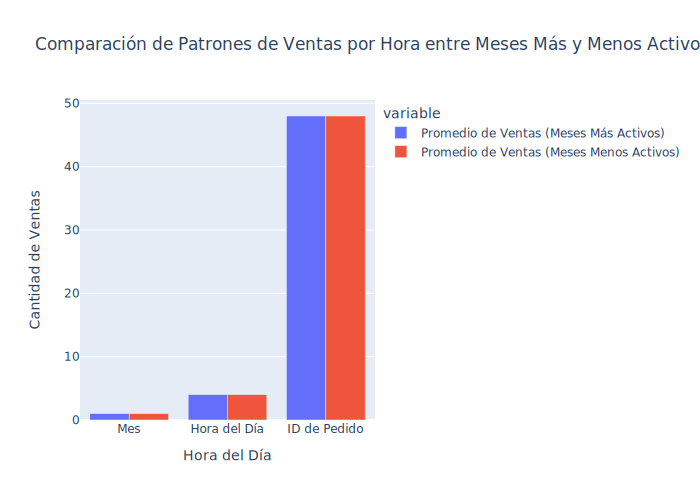

In [114]:
import plotly.express as px

# Calcular el promedio de ventas por hora para todos los meses
ventas_promedio_por_hora = datos_combinados.groupby('Hora del Día')['ID de Pedido'].count() / len(datos_combinados)

# Identificar los meses de mayor y menor actividad
meses_con_mas_ventas = ventas_promedio_por_hora.groupby(datos_combinados['Mes']).mean().nlargest(3).index
meses_con_menos_ventas = ventas_promedio_por_hora.groupby(datos_combinados['Mes']).mean().nsmallest(3).index

# Calcular el promedio de ventas por hora para los meses de mayor y menor actividad
ventas_promedio_por_hora_meses_mas_activos = ventas_por_hora_por_mes.loc[meses_con_mas_ventas].mean()
ventas_promedio_por_hora_meses_menos_activos = ventas_por_hora_por_mes.loc[meses_con_menos_ventas].mean()

# Crear un DataFrame para los datos de los meses activos y menos activos
df = pd.DataFrame({
    'Hora del Día': ventas_promedio_por_hora_meses_mas_activos.index,
    'Promedio de Ventas (Meses Más Activos)': ventas_promedio_por_hora_meses_mas_activos.values,
    'Promedio de Ventas (Meses Menos Activos)': ventas_promedio_por_hora_meses_menos_activos.values
})

# Crear el gráfico de barras interactivo con Plotly Express
fig = px.bar(df, x='Hora del Día', y=['Promedio de Ventas (Meses Más Activos)', 'Promedio de Ventas (Meses Menos Activos)'],
             labels={'Hora del Día': 'Hora del Día', 'value': 'Cantidad de Ventas'},
             title='Comparación de Patrones de Ventas por Hora entre Meses Más y Menos Activos',
             barmode='group')

# Mostrar el gráfico interactivo
fig.show()


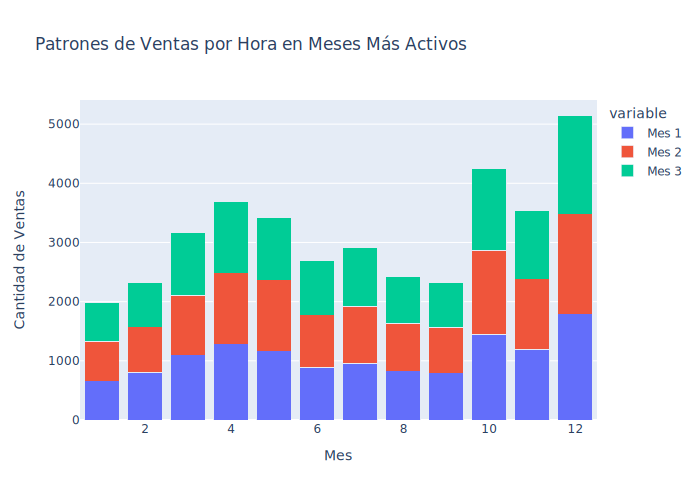

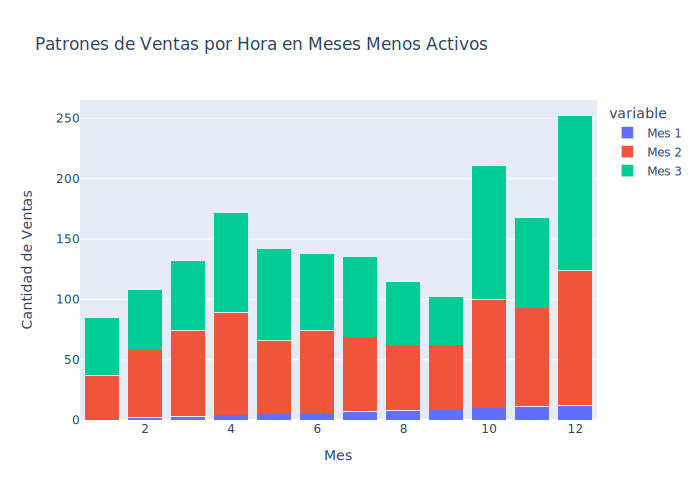

In [115]:
import plotly.express as px

# Calcular la cantidad de ventas por hora para cada mes
ventas_por_hora_por_mes = datos_combinados.groupby(['Mes', 'Hora del Día'])['ID de Pedido'].count().unstack().reset_index()

# Calcular el promedio de ventas por hora para cada mes
ventas_promedio_por_mes = ventas_por_hora_por_mes.mean()

# Identificar los meses de mayor y menor actividad
meses_mas_activos = ventas_promedio_por_mes.nlargest(3).index
meses_menos_activos = ventas_promedio_por_mes.nsmallest(3).index

# Filtrar los datos para incluir solo los meses más y menos activos
ventas_por_hora_meses_activos = ventas_por_hora_por_mes[['Mes'] + list(meses_mas_activos)]
ventas_por_hora_meses_menos_activos = ventas_por_hora_por_mes[['Mes'] + list(meses_menos_activos)]

# Renombrar las columnas para que coincidan con el gráfico
ventas_por_hora_meses_activos.columns = ['Mes', 'Mes 1', 'Mes 2', 'Mes 3']
ventas_por_hora_meses_menos_activos.columns = ['Mes', 'Mes 1', 'Mes 2', 'Mes 3']

# Crear un gráfico de barras apiladas para los meses más activos
fig_mas_activos = px.bar(ventas_por_hora_meses_activos, x='Mes', y=['Mes 1', 'Mes 2', 'Mes 3'],
                         labels={'Mes': 'Mes', 'value': 'Cantidad de Ventas'},
                         title='Patrones de Ventas por Hora en Meses Más Activos', barmode='stack')

# Crear un gráfico de barras apiladas para los meses menos activos
fig_menos_activos = px.bar(ventas_por_hora_meses_menos_activos, x='Mes', y=['Mes 1', 'Mes 2', 'Mes 3'],
                           labels={'Mes': 'Mes', 'value': 'Cantidad de Ventas'},
                           title='Patrones de Ventas por Hora en Meses Menos Activos', barmode='stack')

# Mostrar los gráficos interactivos
fig_mas_activos.show()
fig_menos_activos.show()




3. Distribución de ventas por ubicación:

● ¿En qué ciudades se han registrado las mayores ventas?

● ¿Cómo se comparan las ventas en diferentes estados o regiones?

● ¿Existe variación en las ventas por estado a lo largo de los meses?

In [116]:
# Calcular las ventas totales por ubicación (dirección de envío)
ventas_por_ubicacion = datos_combinados.groupby('Dirección de Envio')['Cantidad Pedida'].sum()

# Ordenar las ubicaciones de mayor a menor ventas
ventas_por_ubicacion_ordenadas = ventas_por_ubicacion.sort_values(ascending=False)

# Mostrar las ubicaciones con las mayores ventas
ubicaciones_con_mayores_ventas = ventas_por_ubicacion_ordenadas.head(10)
ubicaciones_con_mayores_ventas = pd.DataFrame({'Ubicación': ubicaciones_con_mayores_ventas.index, 'Ventas Totales': ubicaciones_con_mayores_ventas.values})
ubicaciones_con_mayores_ventas


,Ubicación,Ventas Totales
0,"338 Hickory St, Los Angeles, CA 90001",12
1,"716 5th St, San Francisco, CA 94016",11
2,"60 10th St, San Francisco, CA 94016",11
3,"927 Jefferson St, New York City, NY 10001",10
4,"413 Ridge St, San Francisco, CA 94016",10
5,"876 Adams St, San Francisco, CA 94016",10
6,"223 Elm St, Los Angeles, CA 90001",10
7,"26 Adams St, San Francisco, CA 94016",9
8,"776 Main St, San Francisco, CA 94016",9
9,"867 Sunset St, San Francisco, CA 94016",9


In [117]:
# Extraer el estado de la dirección de envío
datos_combinados['Estado'] = datos_combinados['Dirección de Envio'].str.split(',').str[-2].str.strip()

# Calcular las ventas totales por estado
ventas_por_estado = datos_combinados.groupby('Estado')['Cantidad Pedida'].sum()

# Ordenar los estados de mayor a menor ventas
ventas_por_estado_ordenadas = ventas_por_estado.sort_values(ascending=False)

df_ventas_por_estado = pd.DataFrame({'Estado': ventas_por_estado_ordenadas.index, 'Ventas Totales': ventas_por_estado_ordenadas.values})

# Mostrar el DataFrame
df_ventas_por_estado


,Estado,Ventas Totales
0,San Francisco,50169
1,Los Angeles,33247
2,New York City,27903
3,Boston,22494
4,Dallas,16707
5,Atlanta,16584
6,Seattle,16534
7,Portland,14037
8,Austin,11137


In [118]:
ventas_mensuales_por_estado = datos_combinados.groupby(['Estado', 'Mes'])['Cantidad Pedida'].sum().unstack()




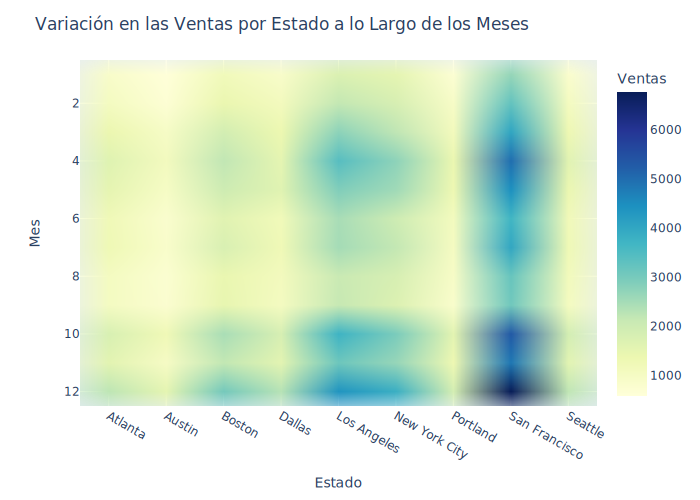

In [119]:
import plotly.express as px
import pandas as pd

# Crear una tabla pivote de las ventas mensuales por estado
ventas_pivot = ventas_mensuales_por_estado.T

# Configurar el tamaño del gráfico
fig = px.imshow(ventas_pivot,
                color_continuous_scale='YlGnBu',
                labels=dict(x="Estado", y="Mes", color="Ventas"),
                x=ventas_pivot.columns,
                y=ventas_pivot.index)

# Agregar anotaciones y formato
fig.update_traces(text=ventas_pivot.values, showscale=True)
fig.update_layout(title='Variación en las Ventas por Estado a lo Largo de los Meses',
                  xaxis_title='Estado',
                  yaxis_title='Mes')
fig.show()




4. Análisis del producto más vendido:

● ¿Cuál es el producto más vendido en general y en cada mes?

● ¿Qué factores crees que han contribuido al éxito de ese producto en particular?

In [120]:
# Calcular el producto más vendido en general
producto_mas_vendido_general = datos_combinados.groupby('Producto')['Cantidad Pedida'].sum().idxmax()
print(f"El producto más vendido en general es: {producto_mas_vendido_general}")


El producto más vendido en general es: AAA Batteries (4-pack)


In [121]:

# Crear un diccionario para almacenar los productos más vendidos por mes
productos_mas_vendidos_por_mes = {'Mes': [], 'Producto Más Vendido': []}

# Calcular las ventas totales por producto para cada mes
for mes in datos_combinados['Mes'].unique():
    ventas_por_mes = datos_combinados[datos_combinados['Mes'] == mes].groupby('Producto')['Cantidad Pedida'].sum().reset_index()
    producto_mas_vendido_mes = ventas_por_mes.sort_values(by='Cantidad Pedida', ascending=False).iloc[0]
    productos_mas_vendidos_por_mes['Mes'].append(mes)
    productos_mas_vendidos_por_mes['Producto Más Vendido'].append(producto_mas_vendido_mes['Producto'])

# Crear un DataFrame a partir del diccionario
productos_mas_vendidos_por_mes_df = pd.DataFrame(productos_mas_vendidos_por_mes)

# Mostrar el DataFrame de productos más vendidos por mes
productos_mas_vendidos_por_mes_df

,Mes,Producto Más Vendido
0,1,AAA Batteries (4-pack)
1,2,AAA Batteries (4-pack)
2,3,AAA Batteries (4-pack)
3,4,AAA Batteries (4-pack)
4,5,AAA Batteries (4-pack)
5,6,AAA Batteries (4-pack)
6,7,AAA Batteries (4-pack)
7,8,AAA Batteries (4-pack)
8,9,AAA Batteries (4-pack)
9,10,AAA Batteries (4-pack)


In [122]:
#

In [123]:
import pandas as pd

# Crear un diccionario para almacenar los productos más vendidos por mes
productos_mas_vendidos_por_mes = {'Mes': [], 'Producto Más Vendido': []}

# Calcular las ventas totales por producto para cada mes
for mes in datos_combinados['Mes'].unique():
    ventas_por_mes = datos_combinados[datos_combinados['Mes'] == mes].groupby('Producto')['Cantidad Pedida'].sum().reset_index()
    producto_mas_vendido_mes = ventas_por_mes.sort_values(by='Cantidad Pedida', ascending=False).iloc[0]
    productos_mas_vendidos_por_mes['Mes'].append(mes)
    productos_mas_vendidos_por_mes['Producto Más Vendido'].append(producto_mas_vendido_mes['Producto'])

# Crear un DataFrame a partir del diccionario
productos_mas_vendidos_por_mes_df = pd.DataFrame(productos_mas_vendidos_por_mes)

# Mostrar el DataFrame de productos más vendidos por mes
productos_mas_vendidos_por_mes_df



,Mes,Producto Más Vendido
0,1,AAA Batteries (4-pack)
1,2,AAA Batteries (4-pack)
2,3,AAA Batteries (4-pack)
3,4,AAA Batteries (4-pack)
4,5,AAA Batteries (4-pack)
5,6,AAA Batteries (4-pack)
6,7,AAA Batteries (4-pack)
7,8,AAA Batteries (4-pack)
8,9,AAA Batteries (4-pack)
9,10,AAA Batteries (4-pack)


In [124]:
#responder sobre  ¿Qué factores crees que han contribuido al éxito de ese producto en particular?

5. Tendencia ventas:

● ¿Existe alguna tendencia o patrón en las ventas que se repita a lo largo de los días en los diferentes meses?

● ¿Cómo varían las ventas a lo largo de los diferentes días de la semana?

● ¿Se observa alguna diferencia significativa en las ventas entre los días laborables y
los fines de semana?


In [125]:
# Agrupar los datos por día y calcular las ventas totales o promedio para cada día
ventas_por_dia = datos_combinados.groupby('Fecha de Compra')['Cantidad Pedida'].sum().reset_index()
ventas_por_dia['Fecha de Compra'] = pd.to_datetime(ventas_por_dia['Fecha de Compra'])
ventas_por_dia.set_index('Fecha de Compra', inplace=True)

# Calcular el promedio de ventas por día
ventas_promedio_por_dia = ventas_por_dia.resample('D').mean()

# Mostrar el DataFrame con la tendencia de ventas
ventas_promedio_por_dia



,Cantidad Pedida
Fecha de Compra,
2019-01-01,1.361111
2019-01-02,1.301418
2019-01-03,1.369295
2019-01-04,1.310757
2019-01-05,1.349810
...,...
2019-12-28,1.605536
2019-12-29,1.640275
2019-12-30,1.681818


c:\Users\Usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\_plotly_utils\basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



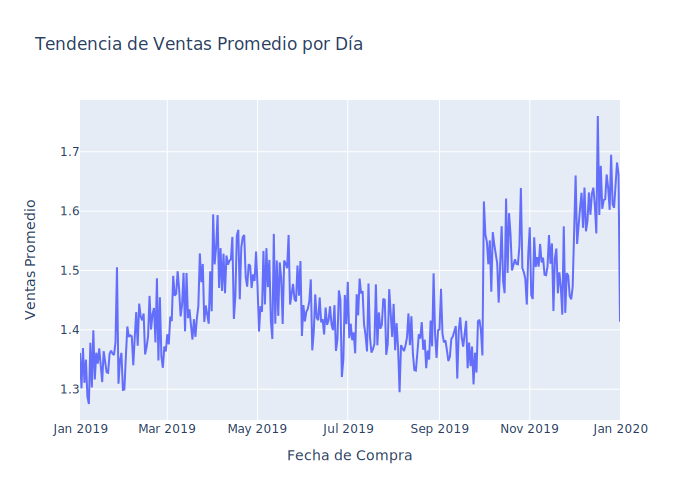

In [126]:
import plotly.express as px

# Crear un gráfico de tendencia de ventas promedio por día con Plotly
fig = px.line(ventas_promedio_por_dia, x=ventas_promedio_por_dia.index, y='Cantidad Pedida', title='Tendencia de Ventas Promedio por Día')
fig.update_xaxes(title='Fecha de Compra')
fig.update_yaxes(title='Ventas Promedio')
fig.show()



In [127]:
#datos_combinados = datos_combinados[datos_combinados['Fecha de Pedido'] != 'Order Date']


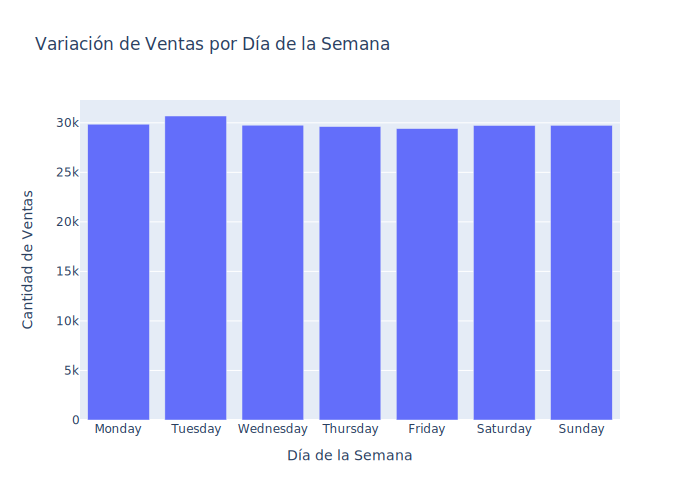

In [128]:
import pandas as pd
import plotly.express as px

# Supongamos que ya tienes datos_combinados como DataFrame

# Convertir la columna 'Fecha de Pedido' a formato datetime
datos_combinados['Fecha de Pedido'] = pd.to_datetime(datos_combinados['Fecha de Pedido'], format='%m/%d/%y %H:%M', errors='coerce')


# Agregar una columna para el día de la semana
datos_combinados['Día de la Semana'] = datos_combinados['Fecha de Pedido'].dt.day_name()

# Agrupar los datos por día de la semana y calcular la suma de las ventas
ventas_por_dia_semana = datos_combinados.groupby('Día de la Semana')['Cantidad Pedida'].sum().reset_index()

# Ordenar los días de la semana en el orden correcto
dias_semana = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
ventas_por_dia_semana['Día de la Semana'] = pd.Categorical(ventas_por_dia_semana['Día de la Semana'], categories=dias_semana, ordered=True)
ventas_por_dia_semana = ventas_por_dia_semana.sort_values('Día de la Semana')

# Crear el gráfico de barras con Plotly Express
fig = px.bar(ventas_por_dia_semana, x='Día de la Semana', y='Cantidad Pedida',
             title='Variación de Ventas por Día de la Semana',
             labels={'Día de la Semana': 'Día de la Semana', 'Cantidad Pedida': 'Cantidad de Ventas'})

# Mostrar el gráfico
fig.show()



In [129]:
# Crear una nueva columna que indique si el día es laborable o fin de semana
datos_combinados['Dia de la Semana'] = datos_combinados['Fecha de Compra'].dt.dayofweek
datos_combinados['Tipo de Dia'] = datos_combinados['Dia de la Semana'].apply(lambda x: 'Laborable' if x < 5 else 'Fin de Semana')

# Calcular las ventas totales por tipo de día
ventas_por_tipo_de_dia = datos_combinados.groupby('Tipo de Dia')['Cantidad Pedida'].sum()

# Mostrar las ventas por tipo de día
ventas_por_tipo_de_dia


Tipo de Dia
Fin de Semana     59474
Laborable        149338
Name: Cantidad Pedida, dtype: int32

In [130]:
import pandas as pd

# Supongamos que tu DataFrame se llama 'datos_combinados' y tienes una columna 'Fecha de Compra'
datos_combinados['Fecha de Compra'] = pd.to_datetime(datos_combinados['Fecha de Compra'])
datos_combinados['Día de la Semana'] = datos_combinados['Fecha de Compra'].dt.day_name()
# Filtrar las ventas de días laborables
ventas_dias_laborables = datos_combinados[datos_combinados['Día de la Semana'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])]

# Filtrar las ventas de fines de semana
ventas_fines_de_semana = datos_combinados[datos_combinados['Día de la Semana'].isin(['Saturday', 'Sunday'])]

# Calcular las ventas totales para cada grupo
ventas_totales_dias_laborables = ventas_dias_laborables['Cantidad Pedida'].sum()
ventas_totales_fines_de_semana = ventas_fines_de_semana['Cantidad Pedida'].sum()

diferencia_ventas = ventas_totales_dias_laborables - ventas_totales_fines_de_semana

# O calcular la proporción de ventas de días laborables sobre ventas de fines de semana
proporcion_ventas = ventas_totales_dias_laborables / ventas_totales_fines_de_semana
print("Ventas totales en días laborables:", ventas_totales_dias_laborables)
print("Ventas totales en fines de semana:", ventas_totales_fines_de_semana)
print("Diferencia en ventas:", diferencia_ventas)
print("Proporción de ventas (días laborables / fines de semana):", proporcion_ventas)


Ventas totales en días laborables: 149338
Ventas totales en fines de semana: 59474
Diferencia en ventas: 89864
Proporción de ventas (días laborables / fines de semana): 2.510979587719003


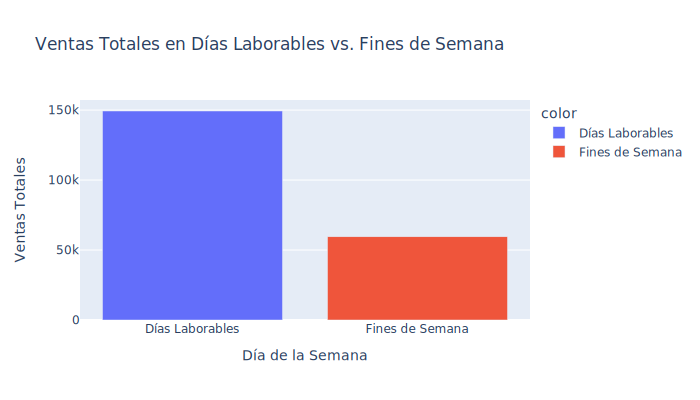

In [139]:
import plotly.express as px

# Datos de ejemplo
dias = ['Días Laborables', 'Fines de Semana']
ventas = [ventas_totales_dias_laborables, ventas_totales_fines_de_semana]

# Crear un gráfico de barras apiladas
fig = px.bar(x=dias, y=ventas, color=dias,
             labels={'x': 'Día de la Semana', 'y': 'Ventas Totales'},
             title='Ventas Totales en Días Laborables vs. Fines de Semana',
             height=400)  # Puedes ajustar la altura del gráfico según tus necesidades

# Mostrar el gráfico interactivo
fig.show()



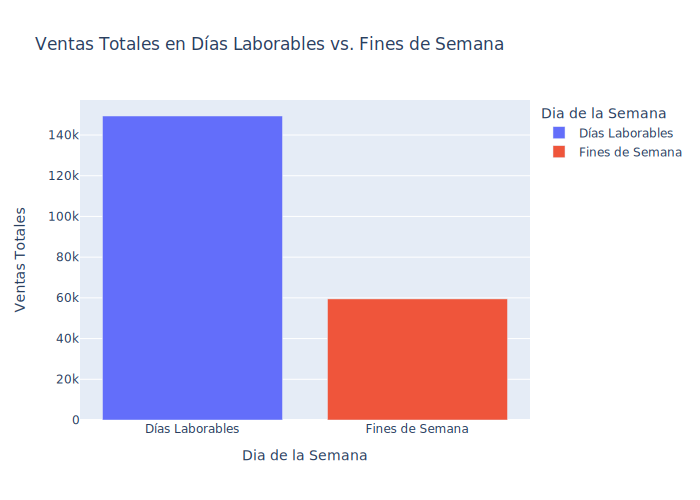

In [132]:
import plotly.express as px
import pandas as pd

# Crear un DataFrame de ejemplo
data = {
    'Dia de la Semana': ['Días Laborables', 'Fines de Semana'],
    'Ventas Totales': [ventas_totales_dias_laborables, ventas_totales_fines_de_semana]
}

df = pd.DataFrame(data)

# Crear un gráfico de barras con Plotly Express
fig = px.bar(df, x='Dia de la Semana', y='Ventas Totales', color='Dia de la Semana',
             labels={'Ventas Totales': 'Ventas Totales'},
             title='Ventas Totales en Días Laborables vs. Fines de Semana')

# Mostrar el gráfico interactivo
fig.show()


6. Impacto de eventos especiales en las ventas:

● ¿Se ha observado algún aumento o disminución significativa en las ventas en días cercanos a eventos especiales, como días festivos?

● ¿Qué eventos específicos han tenido un impacto notable en el comportamiento de
las ventas y cómo se manifestó ese impacto?


In [133]:
#Trasformo los valores en un formato de fecha y hora
datos_combinados['Fecha de Compra'] = pd.to_datetime(datos_combinados['Fecha de Pedido']) #Si no aplicamos esto, cuando queremos extraer la hora nos tira error

In [134]:
# Realizamos una funcion
def extraer_mes(datos):
  datos['Mes'] = datos['Fecha de Compra'].dt.month

  return datos

In [135]:
datos_combinados =  extraer_mes(datos_combinados) #Aplicamos la funcion

datos_combinados = datos_combinados.sort_values(by='Mes')#ordeno los meses
datos_combinados

,ID de Pedido,Producto,Cantidad Pedida,Precio Unitario,Fecha de Pedido,Dirección de Envio,Fecha de Compra,Mes,Total Ingresos,Hora del Día,Estado,Día de la Semana,Dia de la Semana,Tipo de Dia
58768,144330,AA Batteries (4-pack),1,3,2019-01-11 14:37:00,"112 13th St, San Francisco, CA 94016",2019-01-11 14:37:00,1,3,14,San Francisco,Friday,4,Laborable
43512,308185,27in FHD Monitor,1,149,2020-01-01 04:06:00,"202 Maple St, San Francisco, CA 94016",2020-01-01 04:06:00,1,149,4,San Francisco,Wednesday,2,Laborable
43656,308322,Bose SoundSport Headphones,1,99,2020-01-01 00:24:00,"362 Willow St, San Francisco, CA 94016",2020-01-01 00:24:00,1,99,0,San Francisco,Wednesday,2,Laborable
41061,305840,Bose SoundSport Headphones,1,99,2020-01-01 04:54:00,"784 River St, San Francisco, CA 94016",2020-01-01 04:54:00,1,99,4,San Francisco,Wednesday,2,Laborable
40744,305538,Apple Airpods Headphones,1,150,2020-01-01 01:00:00,"693 1st St, Portland, OR 97035",2020-01-01 01:00:00,1,150,1,Portland,Wednesday,2,Laborable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43510,308183,Lightning Charging Cable,1,14,2019-12-11 13:25:00,"270 8th St, Los Angeles, CA 90001",2019-12-11 13:25:00,12,14,13,Los Angeles,Wednesday,2,Laborable
43511,308184,AA Batteries (4-pack),1,3,2019-12-17 14:20:00,"423 11th St, San Francisco, CA 94016",2019-12-17 14:20:00,12,3,14,San Francisco,Tuesday,1,Laborable
43513,308186,Lightning Charging Cable,2,14,2019-12-15 12:44:00,"908 Lake St, Atlanta, GA 30301",2019-12-15 12:44:00,12,28,12,Atlanta,Sunday,6,Fin de Semana
43465,308141,AAA Batteries (4-pack),1,2,2019-12-25 18:09:00,"259 Center St, San Francisco, CA 94016",2019-12-25 18:09:00,12,2,18,San Francisco,Wednesday,2,Laborable


In [136]:

# Filtrar solo las ventas en diciembre (mes 12)
ventas_diciembre = datos_combinados[datos_combinados['Mes'] == 12]

# Crear un DataFrame con las ventas de diciembre
ventas_diciembre_df = pd.DataFrame(ventas_diciembre)

# Mostrar el DataFrame con las ventas de diciembre
ventas_diciembre_df



,ID de Pedido,Producto,Cantidad Pedida,Precio Unitario,Fecha de Pedido,Dirección de Envio,Fecha de Compra,Mes,Total Ingresos,Hora del Día,Estado,Día de la Semana,Dia de la Semana,Tipo de Dia
152674,293658,Lightning Charging Cable,1,14,2019-12-01 02:44:00,"934 Lincoln St, Dallas, TX 75001",2019-12-01 02:44:00,12,14,2,Dallas,Sunday,6,Fin de Semana
148443,289606,27in 4K Gaming Monitor,1,389,2019-12-01 00:26:00,"722 Adams St, Los Angeles, CA 90001",2019-12-01 00:26:00,12,389,0,Los Angeles,Sunday,6,Fin de Semana
43516,308189,Lightning Charging Cable,1,14,2019-12-19 12:27:00,"736 Park St, Los Angeles, CA 90001",2019-12-19 12:27:00,12,14,12,Los Angeles,Thursday,3,Laborable
149096,290233,Lightning Charging Cable,1,14,2019-12-01 01:40:00,"826 4th St, San Francisco, CA 94016",2019-12-01 01:40:00,12,14,1,San Francisco,Sunday,6,Fin de Semana
149802,290906,USB-C Charging Cable,1,11,2019-12-01 01:29:00,"998 1st St, Los Angeles, CA 90001",2019-12-01 01:29:00,12,11,1,Los Angeles,Sunday,6,Fin de Semana
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43510,308183,Lightning Charging Cable,1,14,2019-12-11 13:25:00,"270 8th St, Los Angeles, CA 90001",2019-12-11 13:25:00,12,14,13,Los Angeles,Wednesday,2,Laborable
43511,308184,AA Batteries (4-pack),1,3,2019-12-17 14:20:00,"423 11th St, San Francisco, CA 94016",2019-12-17 14:20:00,12,3,14,San Francisco,Tuesday,1,Laborable
43513,308186,Lightning Charging Cable,2,14,2019-12-15 12:44:00,"908 Lake St, Atlanta, GA 30301",2019-12-15 12:44:00,12,28,12,Atlanta,Sunday,6,Fin de Semana
43465,308141,AAA Batteries (4-pack),1,2,2019-12-25 18:09:00,"259 Center St, San Francisco, CA 94016",2019-12-25 18:09:00,12,2,18,San Francisco,Wednesday,2,Laborable


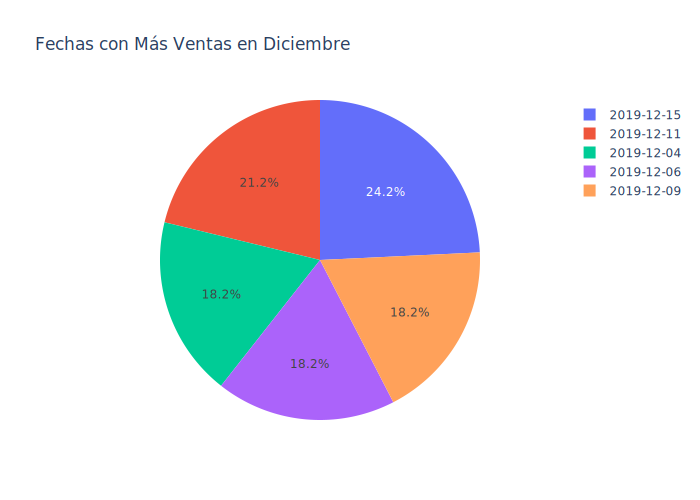

In [140]:
import plotly.express as px

# Calcular la cantidad de ventas por día en diciembre
ventas_por_día_diciembre = ventas_diciembre_df.groupby('Fecha de Pedido')['ID de Pedido'].count()

# Obtener las fechas con más ventas (por ejemplo, las 5 fechas principales)
fechas_con_más_ventas = ventas_por_día_diciembre.nlargest(5).index

# Obtener las cantidades de ventas correspondientes a las fechas con más ventas
cantidades_con_más_ventas = ventas_por_día_diciembre.nlargest(5).values

# Crear un gráfico de pastel con las fechas con más ventas
fig = px.pie(names=fechas_con_más_ventas.strftime('%Y-%m-%d'), values=cantidades_con_más_ventas,
             title='Fechas con Más Ventas en Diciembre')

# Mostrar el gráfico interactivo
fig.show()



In [138]:
#Ofetas de black friday 